In [1]:
from visualizer import draw_dot
from head2grad import Value

In [2]:
v1 = Value(1, label='v1')
v2 = Value(2, label='v2')
v3 = v1 + v2; v3.label = 'v3'
v4 = Value(-5, label='v4')
v5 = v4 * v3; v5.label = 'v5'

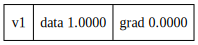

In [3]:
draw_dot(v1)

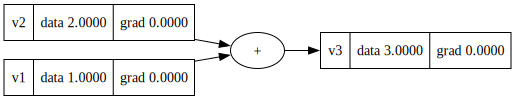

In [4]:
draw_dot(v3)

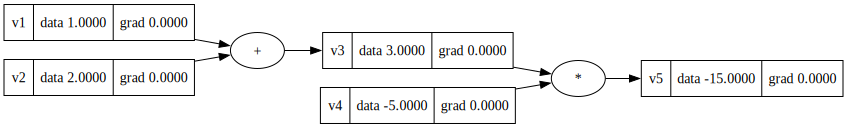

In [5]:
draw_dot(v5)

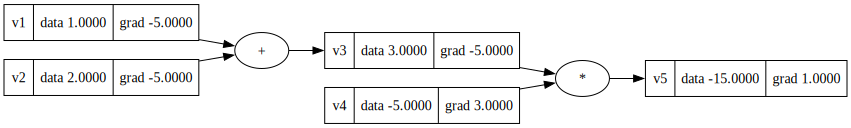

In [6]:
v5.backward()
draw_dot(v5)

### Tanh and topological

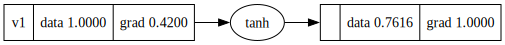

In [7]:
v1 = Value(1, label='v1')
v2 = v1.tanh()
v2.backward()
draw_dot(v2)

In [8]:
from head2grad import build_topological

build_topological(v5, [])

[Value(data=-15), Value(data=-5), Value(data=3), Value(data=1), Value(data=2)]

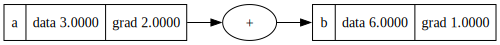

In [9]:
a = Value(3.0, label="a")
b = a + a; b.label = "b"
b.backward()
draw_dot(b)

### Testing

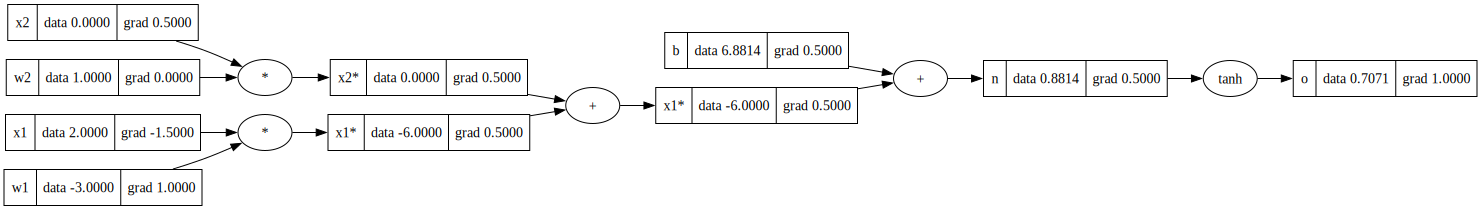

In [10]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)